# **Malicious Url Extraction & Detection From Text**

# Dataset Collection

In [ ]:
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('drive/MyDrive/malicious_phish.csv')
#df = df.sample(frac=0.5, random_state=1)
print(df.shape)
df.head()

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
df.type.value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

# Feature Extraction

In [ ]:
import re

#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [ ]:
#Abnormal URL
#whether the URL contains the hostname as a substring

from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [ ]:
#search for the given URL and return some information.
from googlesearch import search

def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [ ]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

In [ ]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

def count_atrate(url):

    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))

#Checks if Shortened URL
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0


df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [ ]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

In [ ]:
def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))
#Hostname Length

def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

df.head()

def suspicious_words(url):
    match = re.search('login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))


In [ ]:
pip install tld

In [ ]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [ ]:
#df = df.drop("tld",1)

In [ ]:
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,...,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,tld,tld_length
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,1,0,16,0,0,0,13,0,None,-1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,35,0,0,1,29,5,None,-1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,31,0,0,1,25,7,None,-1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,1,4,88,21,0,7,63,9,be,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,1,3,235,23,0,22,199,9,net,3


In [ ]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url',
       'count-https', 'count-http', 'count%', 'count?', 'count-', 'count=',
       'url_length', 'hostname_length', 'sus_url', 'count-digits',
       'count-letters', 'fd_length', 'tld', 'tld_length'],
      dtype='object')

In [ ]:
df['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()



type_code
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

## Creation of Feature & Target

In [ ]:
X = df[['use_of_ip','abnormal_url', 'count-www', 'count.', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]


y = df['type_code']

In [ ]:
X.head()

,use_of_ip,abnormal_url,count-www,count.,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,0,0,0,2,0,0,0,0,0,0,...,0,1,0,16,0,0,0,-1,0,13
1,0,0,0,2,0,2,0,0,0,0,...,0,0,0,35,0,0,5,-1,1,29
2,0,0,0,2,0,3,0,0,0,0,...,0,0,0,31,0,0,7,-1,1,25
3,0,1,1,3,0,1,0,0,0,1,...,1,1,4,88,21,0,9,2,7,63
4,0,1,0,2,0,1,0,0,0,1,...,1,1,3,235,23,0,9,3,22,199


In [ ]:
X.columns

Index(['use_of_ip', 'abnormal_url', 'count-www', 'count.', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters'],
      dtype='object')

In [ ]:
y.head()

0    3
1    0
2    0
3    1
4    1
Name: type_code, dtype: int64

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, shuffle=True, random_state=5)


# Model Building

## Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

      benign       0.88      0.97      0.92     42811
  defacement       0.79      0.86      0.82      9646
    phishing       0.75      0.60      0.67      3252
     malware       0.59      0.32      0.42      9411

    accuracy                           0.84     65120
   macro avg       0.75      0.69      0.71     65120
weighted avg       0.82      0.84      0.82     65120

accuracy:   0.840


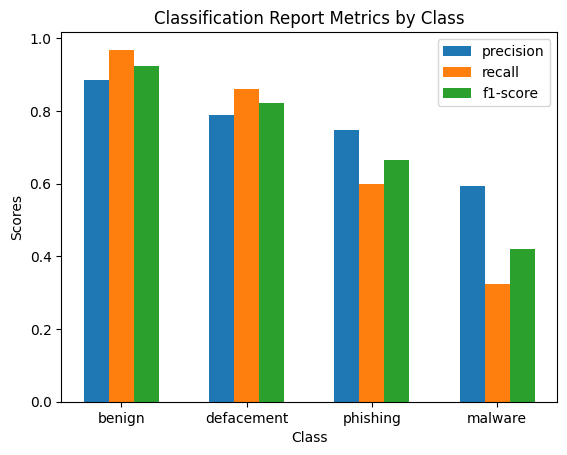

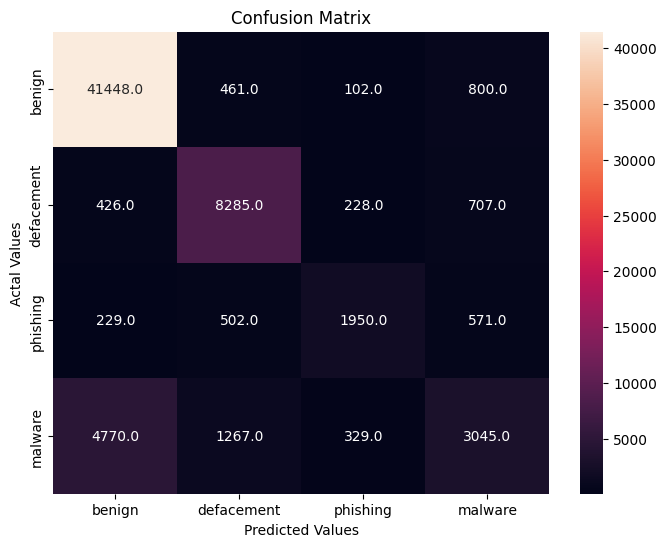

In [ ]:
accuracy = {}


from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr, target_names=['benign', 'defacement', 'phishing', 'malware']))

score = metrics.accuracy_score(y_test, y_pred_lr)
print("accuracy:   %0.3f" % score)

accuracy['Logistic Regression'] = score

#graphs
report = classification_report(y_test, y_pred_lr, target_names=['benign', 'defacement', 'phishing', 'malware'], output_dict=True)
metri = ['precision', 'recall', 'f1-score']
classes = ['benign', 'defacement', 'phishing', 'malware']
data = {metric: [report[cls][metric] for cls in classes] for metric in metri}

n_classes = len(classes)
n_metrics = len(metri)
bar_width = 0.2
index = np.arange(n_classes)

fig, ax = plt.subplots()
for i, metric in enumerate(metri):
    ax.bar(index + i * bar_width, data[metric], bar_width, label=metric)

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes)
ax.legend()
plt.show()
print('\n')


#confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'],
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Stochastic Gradient Descent

              precision    recall  f1-score   support

      benign       0.87      0.98      0.93     42811
  defacement       0.83      0.90      0.86      9646
    phishing       0.77      0.71      0.74      3252
     malware       0.84      0.32      0.46      9411

    accuracy                           0.86     65120
   macro avg       0.83      0.73      0.75     65120
weighted avg       0.86      0.86      0.84     65120

accuracy:   0.860


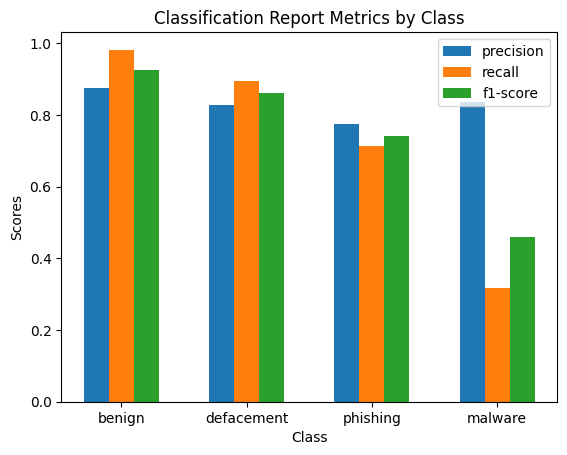

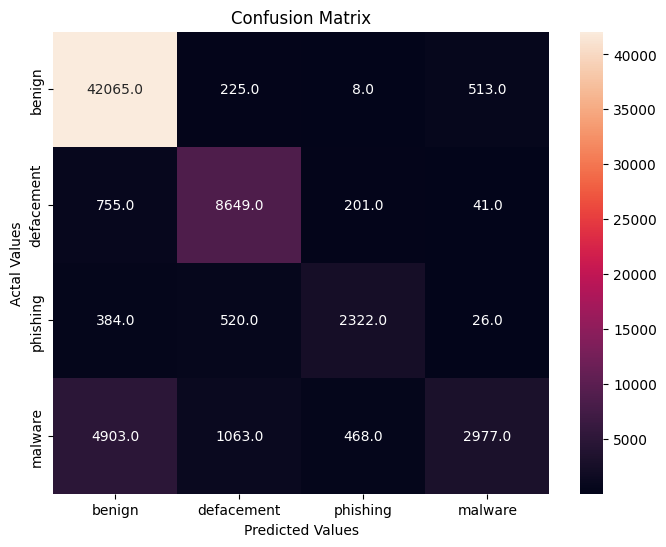

In [ ]:
from sklearn import metrics
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, y_pred_sgd, target_names=['benign', 'defacement', 'phishing', 'malware']))

score = metrics.accuracy_score(y_test, y_pred_sgd)
print("accuracy:   %0.3f" % score)

accuracy['Stochastic Gradient Descent'] = score

#graphs
report = classification_report(y_test, y_pred_sgd, target_names=['benign', 'defacement', 'phishing', 'malware'], output_dict=True)
metri = ['precision', 'recall', 'f1-score']
classes = ['benign', 'defacement', 'phishing', 'malware']
data = {metric: [report[cls][metric] for cls in classes] for metric in metri}

n_classes = len(classes)
n_metrics = len(metri)
bar_width = 0.2
index = np.arange(n_classes)

fig, ax = plt.subplots()
for i, metric in enumerate(metri):
    ax.bar(index + i * bar_width, data[metric], bar_width, label=metric)

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes)
ax.legend()
plt.show()
print('\n')
#confusion matrix
cm = confusion_matrix(y_test, y_pred_sgd)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'],
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Gaussian Naive Bayes

              precision    recall  f1-score   support

      benign       0.91      0.89      0.90     42811
  defacement       0.64      1.00      0.78      9646
    phishing       0.59      0.55      0.57      3252
     malware       0.72      0.38      0.50      9411

    accuracy                           0.82     65120
   macro avg       0.71      0.71      0.69     65120
weighted avg       0.82      0.82      0.81     65120

accuracy:   0.816


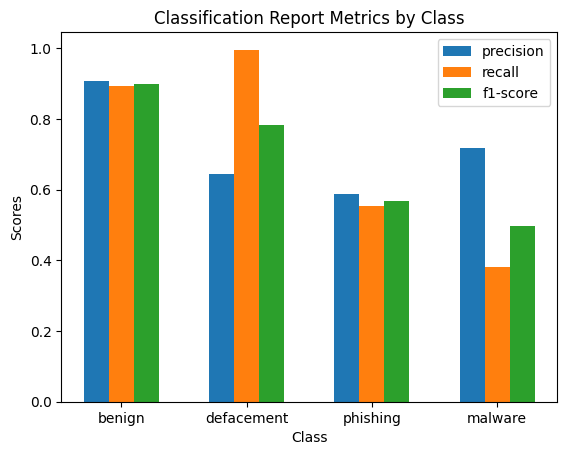

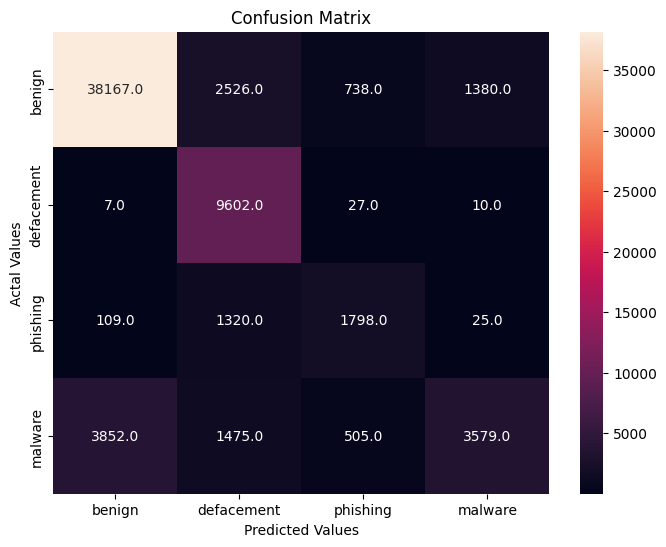

In [ ]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb, target_names=['benign', 'defacement', 'phishing', 'malware']))

score = metrics.accuracy_score(y_test, y_pred_nb)
print("accuracy:   %0.3f" % score)

accuracy['Gaussian Naive Bayes'] = score

#graphs
report = classification_report(y_test, y_pred_nb, target_names=['benign', 'defacement', 'phishing', 'malware'], output_dict=True)
metri = ['precision', 'recall', 'f1-score']
classes = ['benign', 'defacement', 'phishing', 'malware']
data = {metric: [report[cls][metric] for cls in classes] for metric in metri}

n_classes = len(classes)
n_metrics = len(metri)
bar_width = 0.2
index = np.arange(n_classes)

fig, ax = plt.subplots()
for i, metric in enumerate(metri):
    ax.bar(index + i * bar_width, data[metric], bar_width, label=metric)

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes)
ax.legend()
plt.show()
print('\n')
#confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'],
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## K-Nearest Neighbours

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn, target_names=['benign', 'defacement', 'phishing', 'malware']))

score = metrics.accuracy_score(y_test, y_pred_knn)
print("accuracy:   %0.3f" % score)

accuracy['K-Nearest Neighbours'] = score

#graphs
report = classification_report(y_test, y_pred_knn, target_names=['benign', 'defacement', 'phishing', 'malware'], output_dict=True)
metri = ['precision', 'recall', 'f1-score']
classes = ['benign', 'defacement', 'phishing', 'malware']
data = {metric: [report[cls][metric] for cls in classes] for metric in metri}

n_classes = len(classes)
n_metrics = len(metri)
bar_width = 0.2
index = np.arange(n_classes)

fig, ax = plt.subplots()
for i, metric in enumerate(metri):
    ax.bar(index + i * bar_width, data[metric], bar_width, label=metric)

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes)
ax.legend()
plt.show()
print('\n')
#confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'],
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

KeyboardInterrupt: 

## Decision Tree

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

      benign       0.88      0.97      0.92     42811
  defacement       0.79      0.86      0.82      9646
    phishing       0.75      0.60      0.67      3252
     malware       0.59      0.32      0.42      9411

    accuracy                           0.84     65120
   macro avg       0.75      0.69      0.71     65120
weighted avg       0.82      0.84      0.82     65120

accuracy:   0.840


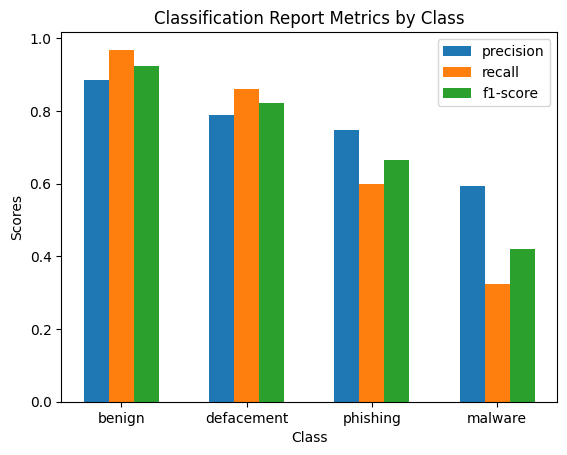

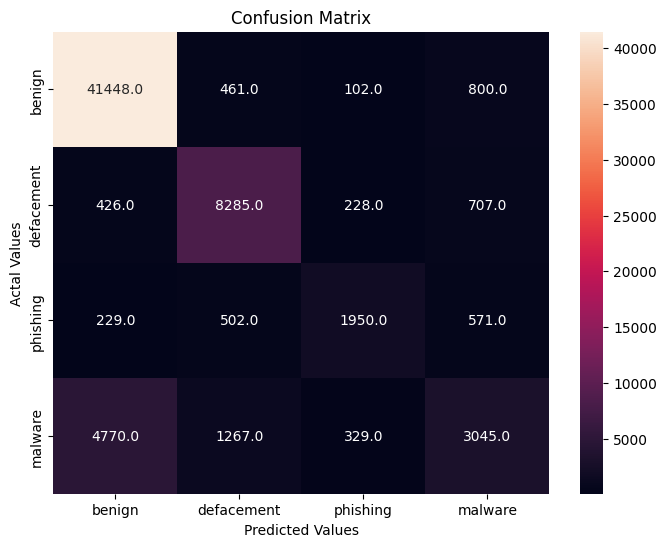

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

dt = LogisticRegression(random_state=14)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt, target_names=['benign', 'defacement', 'phishing', 'malware']))

score = metrics.accuracy_score(y_test, y_pred_dt)
print("accuracy:   %0.3f" % score)

accuracy['Decision Tree'] = score

#graphs
report = classification_report(y_test, y_pred_dt, target_names=['benign', 'defacement', 'phishing', 'malware'], output_dict=True)
metri = ['precision', 'recall', 'f1-score']
classes = ['benign', 'defacement', 'phishing', 'malware']
data = {metric: [report[cls][metric] for cls in classes] for metric in metri}

n_classes = len(classes)
n_metrics = len(metri)
bar_width = 0.2
index = np.arange(n_classes)

fig, ax = plt.subplots()
for i, metric in enumerate(metri):
    ax.bar(index + i * bar_width, data[metric], bar_width, label=metric)

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes)
ax.legend()
plt.show()
print('\n')
#confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'],
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Random Forest Classifier

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     42811
  defacement       0.98      0.99      0.99      9646
    phishing       0.99      0.95      0.97      3252
     malware       0.91      0.86      0.88      9411

    accuracy                           0.97     65120
   macro avg       0.96      0.95      0.95     65120
weighted avg       0.97      0.97      0.97     65120

accuracy:   0.967


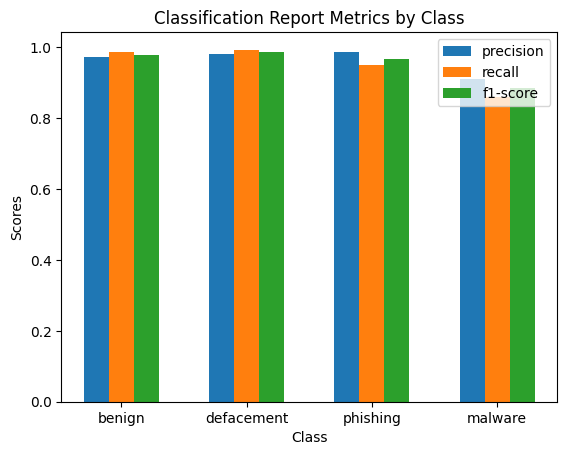

In [ ]:
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names=['benign', 'defacement', 'phishing', 'malware']))

score = metrics.accuracy_score(y_test, y_pred_rf)
print("accuracy:   %0.3f" % score)

accuracy['Random Forest Classifier'] = score

#graphs
report = classification_report(y_test, y_pred_rf, target_names=['benign', 'defacement', 'phishing', 'malware'], output_dict=True)
metri = ['precision', 'recall', 'f1-score']
classes = ['benign', 'defacement', 'phishing', 'malware']
data = {metric: [report[cls][metric] for cls in classes] for metric in metri}

n_classes = len(classes)
n_metrics = len(metri)
bar_width = 0.2
index = np.arange(n_classes)

fig, ax = plt.subplots()
for i, metric in enumerate(metri):
    ax.bar(index + i * bar_width, data[metric], bar_width, label=metric)

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes)
ax.legend()
plt.show()
print('\n')
#confusion matrix

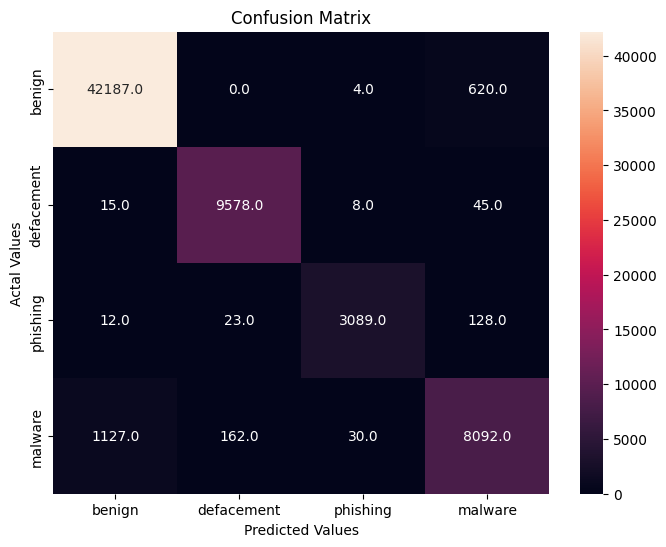

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'],
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## XGboost Classifier

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     42811
  defacement       0.97      0.99      0.98      9646
    phishing       0.98      0.92      0.95      3252
     malware       0.91      0.83      0.87      9411

    accuracy                           0.96     65120
   macro avg       0.96      0.93      0.94     65120
weighted avg       0.96      0.96      0.96     65120

accuracy:   0.962


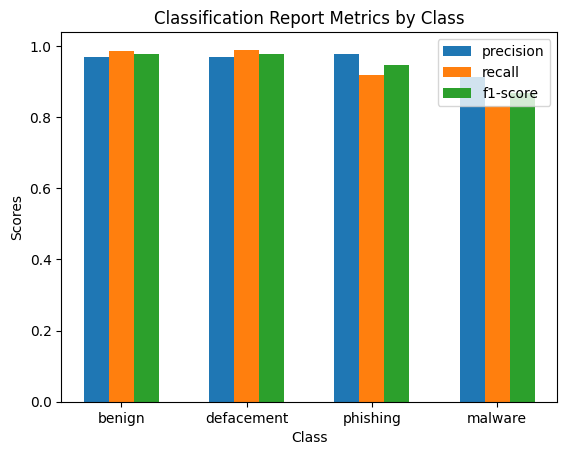

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators= 100)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test,y_pred_xgb,target_names=['benign', 'defacement','phishing','malware']))

score = metrics.accuracy_score(y_test, y_pred_xgb)
print("accuracy:   %0.3f" % score)

accuracy['XGboost Classifier'] = score

#graphs
report = classification_report(y_test, y_pred_xgb, target_names=['benign', 'defacement', 'phishing', 'malware'], output_dict=True)
metri = ['precision', 'recall', 'f1-score']
classes = ['benign', 'defacement', 'phishing', 'malware']
data = {metric: [report[cls][metric] for cls in classes] for metric in metri}

n_classes = len(classes)
n_metrics = len(metri)
bar_width = 0.2
index = np.arange(n_classes)

fig, ax = plt.subplots()
for i, metric in enumerate(metri):
    ax.bar(index + i * bar_width, data[metric], bar_width, label=metric)

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes)
ax.legend()
plt.show()
print('\n')
#confusion matrix

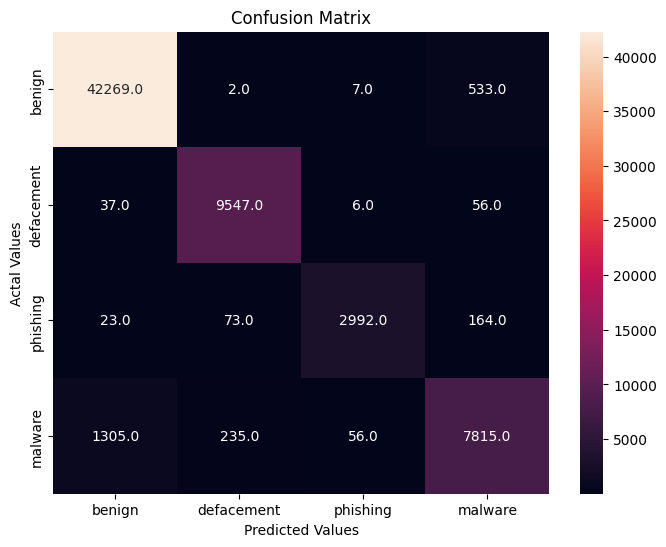

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'],
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

<Axes: >

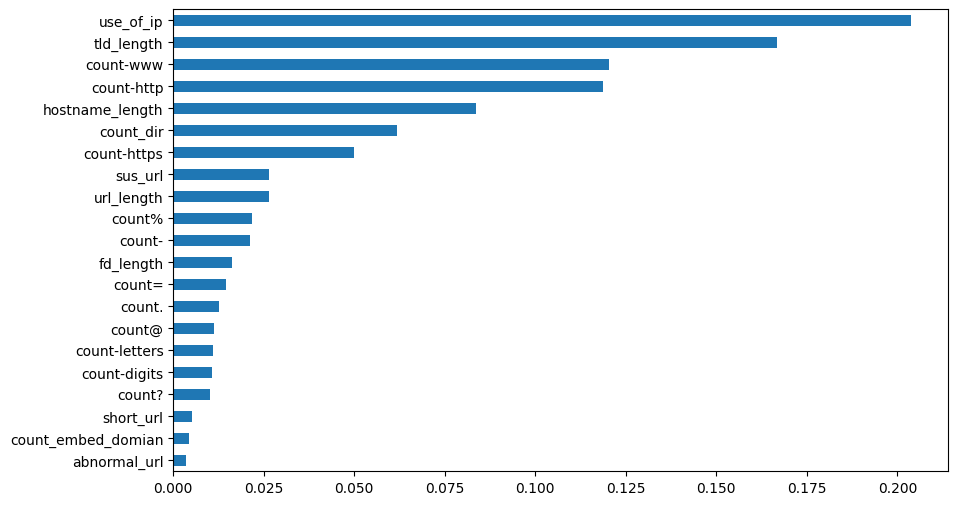

In [ ]:
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

# Model Accuracy Analysis

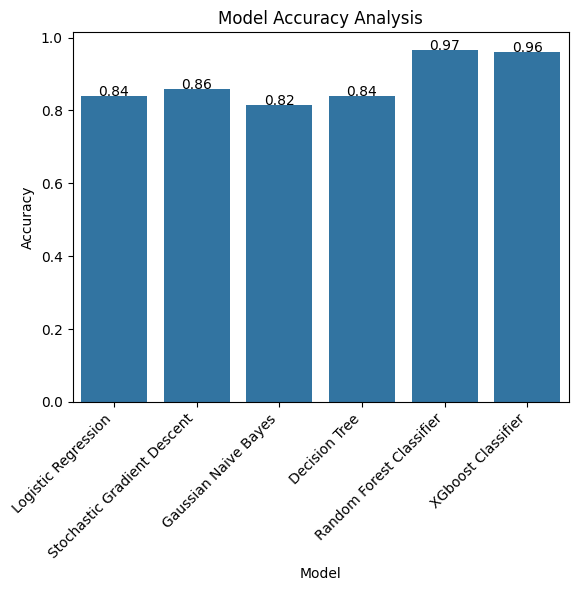

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_accuracy = pd.DataFrame(list(accuracy.items()), columns=['Model', 'Accuracy'])

sns.barplot(x='Model', y='Accuracy', data=df_accuracy)

plt.title('Model Accuracy Analysis')
plt.xticks(rotation=45, ha='right')

for index, row in df_accuracy.iterrows():
    plt.text(index, row.Accuracy, round(row.Accuracy,2), color='black', ha="center")

plt.show()

# Prediction

In [ ]:
def main(url):

    status = []

    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))

    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))

    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))

    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)

    status.append(tld_length(tld))




    return status

In [ ]:
import numpy as np

def get_prediction_from_url(test_url):
    features_test = main(test_url)

    features_test = np.array(features_test).reshape((1, -1))


    pred = xgb.predict(features_test)


    if int(pred[0]) == 0:

        res="ITS A SAFE URL"
        return res
    elif int(pred[0]) == 1.0:

        res="WEB DEFACEMENT"
        return res
    elif int(pred[0]) == 2.0:
        res="ITS A PHISHING URL"
        return res

    elif int(pred[0]) == 3.0:

        res="ITS MALWARE"
        return res


# Extracting Urls from Text Using NLP



In [ ]:
import spacy
import re

nlp = spacy.load("en_core_web_sm")

def extract_urls(text):
    url_pattern = r'\b(?:https?://)?(?:www\.)?[a-zA-Z0-9-]+(?:\.[a-zA-Z]{2,})+\b(?:/[^\s]*)?'

    doc = nlp(text)

    urls = []

    for sent in doc.sents:

        found_urls = re.findall(url_pattern, sent.text)
        urls.extend(found_urls)

    return urls


# Output

In [ ]:
text = '''Visit kakatiya.ac.in/ku-college-of-engineering-and-technology for more info.
titaniumcorporate.co.za and also clik this like to learn about North Dakota en.wikipedia.org/wiki/North_Dakota or
you can also use google.com/search to search what you wish,
but if you click this you get money br-icloud.com.br,corporacionrossenditotours.com'''

urls = extract_urls(text)

#urls = ['kakatiya.ac.in','titaniumcorporate.co.za','en.wikipedia.org/wiki/North_Dakota','google.com/search']
for url in urls:
     print(url , ' : ' ,get_prediction_from_url(url) ,'\n')


kakatiya.ac.in/ku-college-of-engineering-and-technology  :  ITS A SAFE URL 

titaniumcorporate.co.za  :  ITS MALWARE 

en.wikipedia.org/wiki/North_Dakota  :  ITS A SAFE URL 

google.com/search  :  ITS A SAFE URL 

br-icloud.com.br  :  ITS MALWARE 

corporacionrossenditotours.com  :  ITS MALWARE 

